<a href="https://colab.research.google.com/github/seliteng/my_repo/blob/master/Tree_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
Here is a Google Colab notebook for working on small sub-projects. This way we can collaborate and see each other's progress in real time without having to push each edit to Github. 

Below are some basic tests to see how things work.

In [ ]:
# First test: hello world
print('hello world')

hello world


In [ ]:
# Second test: running a program from my CSE163 class

# Importing a CSV file from local drive
from google.colab import files
uploaded = files.upload()
# Storing data from CSV in a Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
# Dataset is now stored in a Pandas Dataframe

print(df)

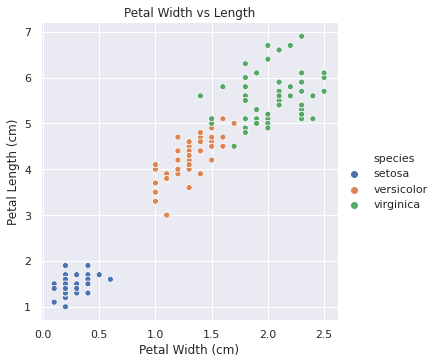

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()


def main():
    # Read iris.csv file using pandas library

    # TODO: Plot petal_width vs petal_length
    sns.relplot(x='petal_width', y='petal_length', data=df, hue='species')
    # TODO: Change the axis labels and title of the graph
    plt.title('Petal Width vs Length')
    plt.xlabel('Petal Width (cm)')
    plt.ylabel('Petal Length (cm)')
    # Save the plot to a file
    # For this problem, we need an extra parameter for a better layout.
    plt.savefig('/home/plot.png', bbox_inches='tight')

    
if __name__ == '__main__':
    main()

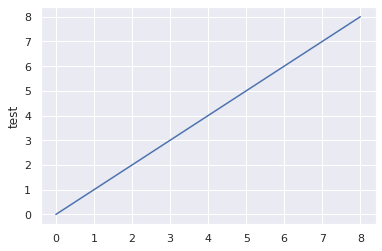

In [ ]:
# Third test: plot a random line plot

df=pd.DataFrame({'test':range(9),'test2':range(9)})
sns.lineplot(x=df.index, y='test', data=df)

In [ ]:
# Fourth test: converting a list to a DataFrame

People_List = [['Jon','Smith',21],['Mark','Brown',38],['Maria','Lee',42],['Jill','Jones',28],['Jack','Ford',55]]

df = DataFrame (People_List,columns=['First_Name','Last_Name','Age'])
print (df)

# 7/13/20 - External temperature data
Here is a plot of the Tacoma temperature data that Michael found with a linear regression fit. But we need to do the linear regression ourselves to figure out what the equation is.

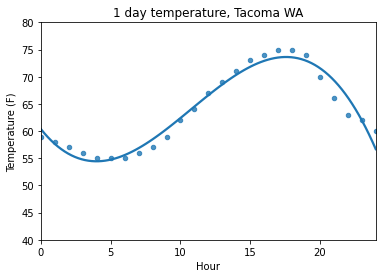

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

T = [59, 58, 57, 56, 55, 55, 55, 56, 57, 59, 62, 64, 67, 69, 71, 73, 74, 75, 75, 74, 70, 66, 63, 62, 60]
df = pd.DataFrame(T, columns = ['Temperature']);
#print(df)
#sns.relplot(data=df, legend=None, kind="line", markers=True);)
sns.regplot(x=list(range(0,25)), y='Temperature', data=df, scatter_kws={"s": 20}, order=3, ci=None)
plt.title('1 day temperature, Tacoma WA');
plt.xlabel('Hour');
plt.ylabel('Temperature (F)');
plt.xlim(0, 24);
plt.ylim(40, 80);


# Try source terms

Use temperature * heat transfer coeff

Use eyeballed values from Fig. 4 of PA paper

# Potter Andresen Reference

Governing Equation

![alt text](https://raw.githubusercontent.com/seliteng/my_repo/master/Screen%20Shot%202020-07-13%20at%209.54.00%20PM.png)

# Combined source terms

I eyeballed the source erms from figure 4 in order to find the insolation, net infared, convection, and conduction for the north and south sides of the tree. I then summed them all up into separate variables totalN and toalS. 

Afterwards used linear interpolation increase the number of points that we can evaluate the source terms on. 

I then plotted these variables for us, as seen below the code

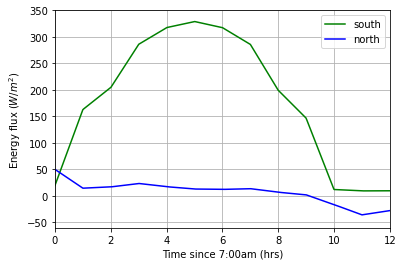

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#  Created 7/14/2020 by Michael Hockman
#  First attempt at combining the source terms into one term
#  To do this I'm using figure 4 from the potter anderson paper to find the conduction "k",
#  the convective heat exchange "H", the insolation "Sdir+Sdif", and net infrared "IRin - IRout"

import matplotlib.pyplot as plt
import numpy as np

albedo = .3  # "For albedo, we assumed a value of 0.3" - Potter Anderson page 3

#  North variables
insolationN = [28, 30, 29, 27, 26, 25, 26, 27, 28, 30, 28, 14, 0]  # IR_in-IR_out
netInfN = [13, -9, -7, -2, -5, -7, -8, -6, -7, -14, -16, -28, -8]  # S_dir+S_dif
convectionN = [13, -9, -7, -2, -5, -7, -8, -9, -16, -18, -33, -30, -22]  # H
# conductionN = [15, -10, -8, -11, -8, -3, -1, -2, 1, 7, 20, 22, 20]  # k
totalN = []

#  Make sure t = [0, 1, 2, ... , 12]
#  because we need 13 on the t-axis for the 13 data points the Potter Anderson paper provides.
t = np.linspace(0, 12, 13)

# x is the number of points the linear interpolation will have
# currently set to be 10x the size of t
x = np.linspace(0, 12, 1000)

#  interpolate the north data
#  Also turn into an array so it sums how I want it to for totalN
insolationNI = np.array(np.interp(x, t, insolationN))
netInfNI = (1-albedo)*np.array(np.interp(x, t, netInfN))  # Scaled by (1-alpha)
convectionNI = np.array(np.interp(x, t, convectionN))

# Sum all the lines up
totalN = insolationNI + netInfNI + convectionNI


#  South variables
insolationS = [20, 180, 240, 330, 370, 390, 370, 330, 240, 180, 40, 30, 20]  # IR_in-IR_out
netInfS = [0, -10, -15, -20, -25, -30, -25, -20, -18, -16, -14, -12, -6]  # S_dir+S_dif
convectionS = [0, -10, -25, -30, -35, -40, -35, -30, -28, -22, -18, -12, -6]  # H
# conductionS = [0, -100, -150, -190, -195, -200, -180, -130, -80, -30, -28, -10, -6]  # k
totalS = []

#  interpolate the south data
#  Also turn into an array so it sums how I want it to for totalS
insolationSI = np.array(np.interp(x, t, insolationS))
netInfSI = (1-albedo)*np.array(np.interp(x, t, netInfS))  # Scaled by (1-alpha)
convectionSI = np.array(np.interp(x, t, convectionS))

# Sum all the lines up
totalS = insolationSI + netInfSI + convectionSI



# print(totalS)
# print(type(totalS))
# print(np.size(totalS))



#  Uncomment if you want to see the plot
plt.plot(x[:], totalS[:], "-g", label="south")
plt.plot(x[:], totalN[:], "-b", label="north")
plt.axis([0,12,-60,350])
plt.legend()
plt.xlabel("Time since 7:00am (hrs)")
plt.ylabel("Energy flux $(W/m^2)$")
plt.grid()
plt.show()


#  input: t0, the time at which the source term will be evaluated at
#  return: North, the total source terms at time t0
#  if it can't be evaluated at t0 exactly, it will find the closest available point to evaluate
def sourceTermsN(t0):
    t0 = int(t0 / 0.012)
    return totalN[t0]

## to grab values
def sourceTermsNvalue(i):
    return totalN[i]

# 0.008 is dt from length of t vector

#  input: t0, the time at which the source term will be evaluated at
#  return: S evaluated at t0, the total source terms at time t0
#  if it can't be evaluated at t0 exactly, it will find the closest available point to evaluate
def sourceTermsS(t0):
    t0 = int(t0/0.012)
    #print(t0)
    return totalS[t0]

## to grab values
def sourceTermsSvalue(i):
    return totalS[i]

# Simply returns an array of size t instead of a single element at point t0
# t is an input to make it match with the Heat1D file
def sourceTermsArrayS(t):
    return totalS[np.arange(1, np.size(t))]


# Simply returns an array of size t instead of a single element at point t0
# t is an input to make it match with the Heat1D file
def sourceTermsArrayN(t):
    return totalN[np.arange(1, np.size(t))]

# Temp_dataVec.py

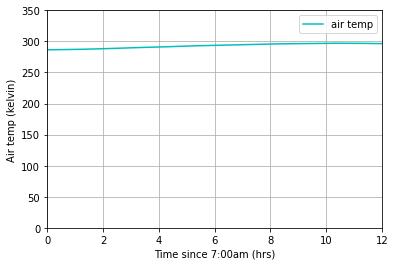

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tuesday 04 08 09:32:45 2020
takes temp measurements from Tacoma, 7 am to 7 pm. Interpolate according to combinedHeatsource_updated.py by Michael Hockman. Use temp at 7 am as initial condition, use interpolation as boundary condition
@author: yajun
"""

import matplotlib.pyplot as plt
import numpy as np

# hourly temperature from 7 o'clock to 7 o'clock, converted to kelvin
T = np.array([56, 57, 59, 62, 64, 67, 69, 71, 73, 74, 75, 75, 74])
T = (T-32)*5/9+273.15

# same variables as combinedHeatsource_updated.py

#  Make sure t = [0, 1, 2, ... , 12]
#  because we need 13 on the t-axis for the 13 data points the Potter Anderson paper provides.
t = np.linspace(0, 12, 13)

# x is the number of points the linear interpolation will have
# currently set to be 10x the size of t
x = np.linspace(0, 12, 1000)

# interpolate temp data

tTemp = np.array(np.interp(x, t, T))


plt.plot(x[:], tTemp[:], "-c", label="air temp")
plt.axis([0,12,0,350])
plt.legend()
plt.xlabel("Time since 7:00am (hrs)")
plt.ylabel("Air temp (kelvin)")
plt.grid()
plt.show()


def TacoTemp(t0):
    t0 = int(t0 / 0.012)
    return tTemp[t0]

## to grab values
def TacomaTemp(i):
    return tTemp[i]

# heat1D_CNpolar_sourceUpdate3.py

(1000, 50)
max and min of soln at final step =  10808.011545235959 556.9475281730785


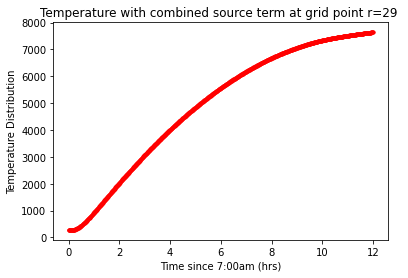

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tuesday 07 14 14:55:12 2020
1D code for heat equation in polar, with Crank-Nicolson
Ref: LeVeque Chapter 9, pg 183
Handling of source term: a primer on PDEs, Salsa et al.
u_t = a*(1/r*u_r + u_rr)
a = rho*c/k
u(x,0)=eta(x) initial condition
d u(0,t)/d r=0 Neumann condition in the center
u(R,t)=g1(t) Dirichlet condition at the bark of tree
ri = i*dr, tn = n*dt, dr = Delta r, dt = Delta t
gs(t) is a source term only occuring at the boundary
CN:
stability to test; standard heat equation CN stable for any dt>0. Take dt = O(dr)
@author: yajun
"""

import numpy as np
from scipy import sparse
from matplotlib import pyplot as plt
# from combinedHeatsource_updated import *
# from Temp_dataVec import *

# number of grid points, space grid points r.
m = 50
r = np.linspace(0, 1, m, endpoint=False)

# number of time steps
n = 1000
t0 = 0
t = np.linspace(t0, 12, n, endpoint=False)

# define dr and dt

dr = r[1] - 0  # grid size
dt = t[1] - t0  # time step

###
k = 0.12
a = 1.7/k

# parameters defined as in paper
beta = dt / (a * dr ** 2)

alpha = np.ones(m - 1)
for j in range(alpha.size):
    alpha[j] = dt / (4 * a * r[j + 1] * dt) - 0.5 * beta
alpha[-1] = -beta

gamma = np.ones(m - 1)
for j in range(1, gamma.size):
    gamma[j] = dt / (4 * a * r[j + 1] * dt) + 0.5 * beta
#    print(r[j+1])
#gamma[0] = beta  # define neumann bdry condition 1st row


######################################################################
# %% define bdry and initial conditions. Just examples, to modify

# initial condition being const. temp at 7 am
def eta(m):
    return ((56 - 32) * 5/ 9 + 273.15) * np.ones(m)


## tree center bdry condition is homogeneous Neumann condition. In matrix

## tree bark with Dirichlet condition for temperature

def g1(t):
    return tTemp[t]

# source term at tree bark
def gs(t):
    # gaussian(x, mu, sig)

    return sourceTermsSvalue(t)


#######################################################################

# %% define matrices in time stepping. Diagonal/super diagonal depend on ri

# diag = np.ones(m) + beta

tridiag = sparse.diags([alpha, np.ones(m) + beta, -gamma], [-1, 0, 1], shape=(m, m)).toarray()

# %%

soln = []

# IC
U0 = eta(m)

# %%
#  Solving Ax1 = Bx0 + b, this is B. No flux results in different last row from before

B = sparse.diags([-alpha, np.ones(m) - beta, gamma], [-1, 0, 1], shape=(m, m)).toarray()



soln.append(U0)

# %% main time stepping: compute rhs = Bx0 + b, then solve for x1 with Ax1 = rhs

for i in range(n - 1):
    rhs = B.dot(U0)
    # dirichlet bdry condition with g1, source at bdry with gs
    # rhs[-1] = rhs[-1] + (dt / (4 * a * r[-1] * dr) + 0.5 * beta) * (g1(i) + g1(i + 1))
    rhs[-1] = rhs[-1] + (dt / (4 * a * r[-1] * dr) + 0.5 * beta) * (g1(i) + g1(i + 1)) + dt/(2*a*dr*k)*(gs(i) + gs(i + 1))
    U1 = np.linalg.solve(tridiag, rhs)  # sparse.linalg.lsqr(tridiag, rhs)
    U0 = U1
    soln.append(U0)
#    print(np.max(soln[i, :]))
# %%
#print(soln)
soln_plot = np.asarray(soln)

print(soln_plot.shape)

print("max and min of soln at final step = ", np.max(soln_plot[-1, :]), np.min(soln_plot[-1, :]))

grid_point = 29
plt.plot(t, soln_plot[:, grid_point], '.r-')
plt.title('Temperature with combined source term at grid point r=%i ' % grid_point)
plt.xlabel('Time since 7:00am (hrs)')
plt.ylabel('Temperature Distribution')
plt.show()

# Weather

The data is from [this](https://www.kaggle.com/selfishgene/historical-hourly-weather-data?select=temperature.csv) source. I couldn't find any weather data on Tacoma so this is for Seattle.

In [68]:
# Uploading pdx csv to Colab
import io
from google.colab import files
uploaded = files.upload()

Saving seattle_hourly_weather.csv to seattle_hourly_weather.csv


24
36    295.240
37    294.380
38    292.280
39    291.120
40    289.930
41    287.870
42    287.140
43    286.540
44    286.160
45    285.310
46    284.300
47    283.960
48    283.595
49    283.230
50    283.500
51    284.570
52    285.640
53    286.710
54    287.420
55    288.610
56    289.130
57    289.410
58    289.180
59    288.950
Name: Seattle, dtype: float64


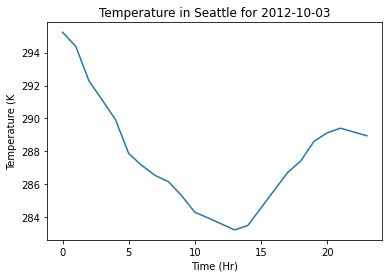

In [90]:
import io
import pandas as pd
import numpy as np
import datetime
from dateutil import relativedelta
from dateutil import parser


def main():
    date = datetime.datetime(2012, 10, 3)
    data_path = io.BytesIO(uploaded['seattle_hourly_weather.csv'])
    #def dateparse(x): return pd.datetime.strptime(x, '%Y-%m-%d %H:%M')
    data_handle = pd.read_csv(data_path, parse_dates=[
                              'datetime']).fillna(0)
    cacheTemperature(data_handle)

def cacheTemperature(data_handle):
    end_delta = relativedelta.relativedelta(days=1)
    end_date = date + end_delta
    end_date = end_date.replace(minute=0, second=0, microsecond=0)
    mask = (data_handle['datetime'] >= date) & (data_handle['datetime'] < end_date)
    df = data_handle.loc[mask]
    print(len(df))
    print(df['Seattle'])

    plt.plot(range(24), df['Seattle'])
    plt.xlabel('Time (Hr)')
    plt.ylabel('Temperature (K')
    plt.title('Temperature in Seattle for {}'.format(date.date()))

if __name__ == '__main__':
    main()



